In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import librosa
from spafe.features.gfcc import gfcc

In [4]:
f1 = 'Alesis-Sanctuary-QCard-Crotales-C6.wav'
f2 = 'E-Mu-Proteus-2-Electric-Guitar-C4.wav'


samplerate1, data1 = wavfile.read(f1)
samplerate2, data2 = wavfile.read(f2)
print('Audio Shape 1:',np.shape(data1),'Audio Shape 2:',np.shape(data2))

Audio Shape 1: (88116, 2) Audio Shape 2: (96333, 2)


C:\Users\k_dys\AppData\Local\Temp\ipykernel_8912\3946358831.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1, data1 = wavfile.read(f1)
C:\Users\k_dys\AppData\Local\Temp\ipykernel_8912\3946358831.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate2, data2 = wavfile.read(f2)


In [6]:
data1 = data1[:,0]
data2 = data2[:,0]

In [34]:
sd.play(data1, samplerate1)
sd.wait()


In [35]:
sd.play(data2, samplerate2)
sd.wait()

In [7]:
duration1 = len(data1)/samplerate1
time1 = np.arange(0,duration1,1/samplerate1) #time vector

duration2 = len(data2)/samplerate2
time2 = np.arange(0,duration2,1/samplerate2) #time vector

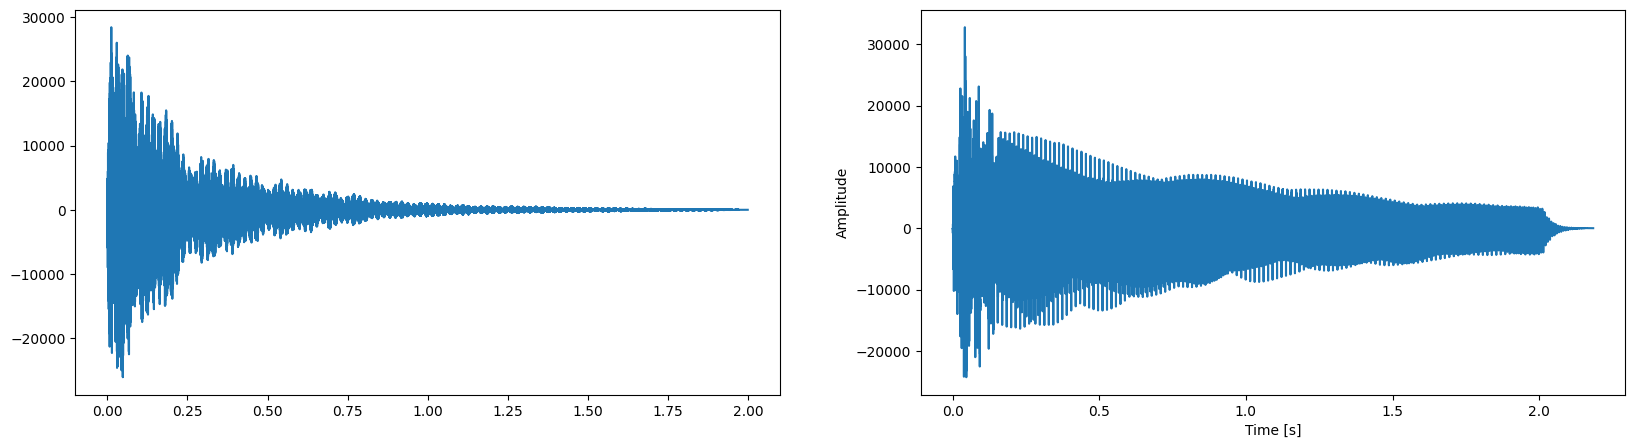

In [13]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))
axs[0].plot(time1, data1)
axs[1].plot(time2, data2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

Спектрограмма

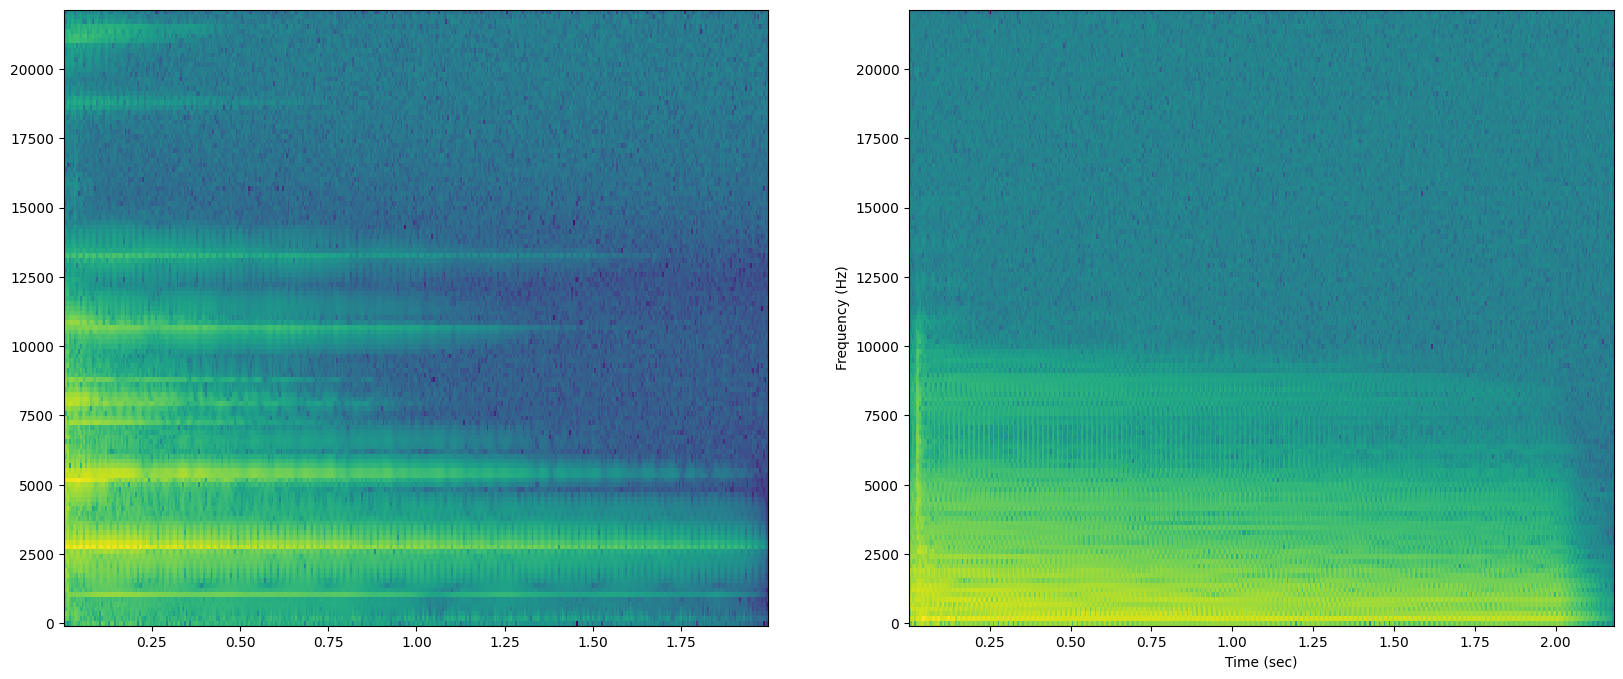

In [17]:
fig, axs = plt.subplots(1,2,figsize=(20, 8))
fr1, tm1, spgram1 = signal.spectrogram(data1,samplerate1)
fr2, tm2, spgram2 = signal.spectrogram(data2,samplerate2)

lspg1 = np.log(spgram1)
lspg2 = np.log(spgram2)
axs[0].pcolormesh(tm1,fr1,lspg1,shading='auto')
axs[1].pcolormesh(tm2,fr2,lspg2,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

Ну, что видно по спектрограмме,

Во-первых разные преобладающие частоты

Во-вторых первый звук быстрее затухает

В-третьих не знаю как это по умному сказать но второй звук более равномерно "размазан" по частотам

In [19]:
samples1, sample_rate1 = librosa.load(f1)

y1 = samples1
sr1 = sample_rate1
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)

samples2, sample_rate2 = librosa.load(f2)

y2 = samples2
sr2 = sample_rate2
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)

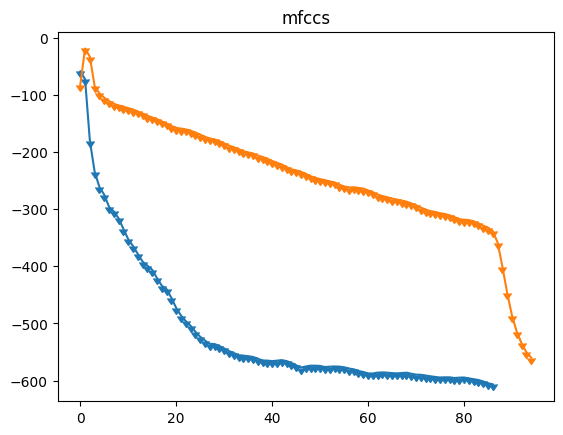

In [22]:
s1 = mfccs1[0:1,:][0,:]
t1 = [*range(len(s1))]
s2 = mfccs2[0:1,:][0,:]
t2 = [*range(len(s2))]
plt.plot(t1,  s1.reshape(87,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.plot(t2,  s2.reshape(95,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.title('mfccs')
plt.show()

In [29]:
samples1, sample_rate1 = librosa.load(f1)

y1 = samples1
sr1 = sample_rate1
gfccs1 = gfcc(y1, fs=sr1, num_ceps=1)

samples2, sample_rate2 = librosa.load(f2)

y2 = samples2
sr2 = sample_rate2
gfccs2 = gfcc(y2, fs=sr2, num_ceps=1)


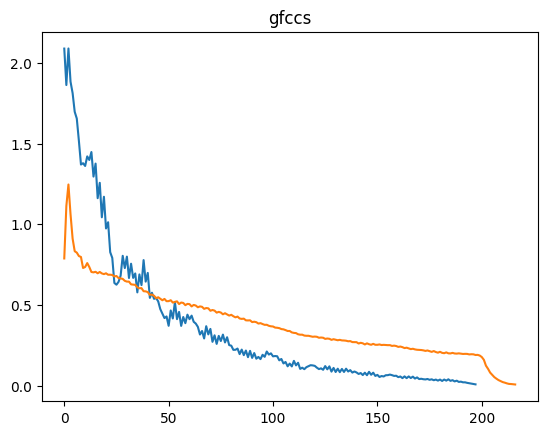

In [31]:
plt.plot(gfccs1)
plt.plot(gfccs2)
plt.title('gfccs')
plt.show()

Ну, как итог что мел-кепстарльные, что гамматон-частотные коэффиценты показывают достаточно большое отличие между звуками.

Графики даже близко не накладываются друг на друга. Да и показывают в целом разное поведение.